# Discrete Probability Introduction

This notebook introduces the basic concepts of discrete probability distributions.  Thinking in terms of probabilities is an important skill in analyzing data and interpreting statistical analyses.

It is inspired by Dr. Kennington's probability examples from Boise State University CS 597.

## Setup

This notebook requires the following Conda packages:

    conda install r-nycflights13

In [1]:
library(tidyverse)
library(nycflights13)
options(repr.plot.height=4)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


The `flights` table from `nycflights13` contains data on over 300,000 flights leaving New York City in 2013. We'll use it as our example in this worksheet.

In [2]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


## What Is a Probability?

Suppose we see a plane leaving the NYC area, and want to know which of the 3 New York airports (EWR, LGA, and JFK) it probably came from. If we know nothing other than ‘a plane left NYC’, then we can look at the _relative frequency_ of flights from the airports: which airport produces the most flights?

We can do this by counting the number of flights from each airport. dplyr makes this easy with `group_by` and `summarize`:

In [3]:
origins = flights %>%
    group_by(origin) %>%
    summarize(count=n())
origins

origin,count
EWR,120835
JFK,111279
LGA,104662


We assign the value to the variable `origins`, and then we ask for the value `origins` on a new line to see the data we just computed. This is useful to be able to make use of this data later!

Also, this data type is called a _data frame_.  A data frame is like a little spreadsheet - it has named columns of data.

The `%>%` business is called a _pipeline_, and it is the standard way to process data in with `tidyverse` (or more specifically `dplyr`).  It pipes the results of each operation into the next, until we finally have results.


It is often convenient to plot data like this, so we can see it visually:

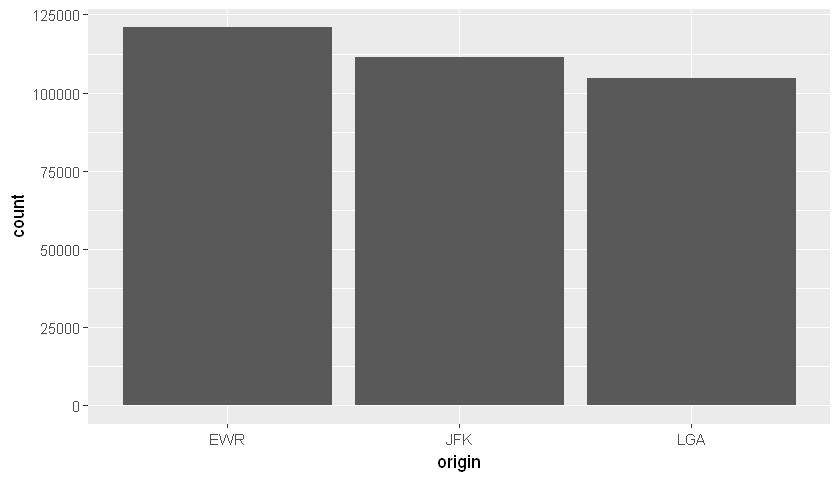

In [4]:
ggplot(flights) +
    aes(x=origin) +
    geom_bar()

EWR (Newark) has the most departing flights. However, these numbers aren't very convenient - 120835 flights left EWR, but that is a little unwieldy if we want to estimate the chances of another flight coming from Newark.

Fortunately, there is a way we can make these numbers easier to deal with: make them sum to 1, so each value is the fraction of flights that left that airport.  Let's do that by dividing each count by the total count:

In [5]:
origins$prob = origins$count / sum(origins$count)
origins

origin,count,prob
EWR,120835,0.3587993
JFK,111279,0.3304244
LGA,104662,0.3107763


This new column, `prob`, indicates the _probability_ of a flight departing from the specified airport, given the observations that we have.  We are making the assumption here that the flights leaving in 2013 are representative of flights leaving New York City in general, so that we can infer things about future flights from this data. We'll explore in more detail later when we can and can't make this kind of assumption.

A _probability_ is a real number between 0 and 1 that expresses how likely something is. (There is a subtle difference between likelihood and probability, but for our current purposes that difference does not matter.)

Origin airport is an example of what we call a _discrete_ value: it has one of a finite set of distinct values (in this case, just 3: EWR, JFK, and LGA).  We also call the origin airport a _variable_: like variables in computer programs, it is one of the parameters that characterizes an _observation_ (one of the flights).  When we are trying to reason about the probability of the variable having different values, we call it a _random variable_: a variable that takes on random values.

> **Note:** We often think of things in terms of random variables and probabilities even when we don't necessarily think that the way they are produced is actually random.  Randomness just provides a convenient way for us to think about the uncertainty we have about our knowledge.

Our table forms a _discrete probability distribution_. A discrete probability distribution associates each possible value of a discrete variable with a _probability_ of the variable having that value.  Each probability must be in the range 0 to 1 (inclusive); in addition, all probabilities in the distribution must sum to 1.  We can check this sum:

In [6]:
sum(origins$prob)

[1] 1

More formally, a probability distribution $P(x)$ over the values of a random variable $X$ is a function $P(x): X \into \mathbb{R}$ such that:

1. $\forall x \in X. 0 \le P(x) \le 1$
2. $\sum_{x \in X} P(x) = 1$

In R, the `$` operator accesses the column of a data frame. It's a lot like `.` in Java or Python.  Each column of this data frame is a _vector_, which is R-speak for an _array_.  The `sum` function sums up the elements of a vector and returns them.

But above, when we converted counts into probabilities: notice that we did not write a loop!  In R, most operations are _vectorized_: when you apply them to vectors, they operate on the whole vector element-by-element.  If we take two vectors and add them, we get the pairwise sum:

In [7]:
c(1,2,3) + c(10, 20, 30)

[1] 11 22 33

In R, there is no such thing as a single value - a value is a vector of length 1.  And when two vectors have different lengths, R will _recycle_ the shorter one:

In [8]:
c(1,2,3) + 5

[1] 6 7 8

This can get us in trouble sometimes if we don't have our vectors quite straight. Fortunately, R warns us in the common error case where we have two multi-item vectors but their lengths aren't compatible:

In [9]:
c(1,2,3) + c(1,2)

Warning message in c(1, 2, 3) + c(1, 2):
"longer object length is not a multiple of shorter object length"

[1] 2 4 4

Most R computations work over vectors.  A basic rule of thumb is to **never use loops.**  R has them, but you won't need them very often at all.  Vectorized operations are much faster than manually looping, and are easier to write.

## Names and Math

Our distribution above, over origin airports, is what is called a _multinomial distribution_.  That is, it is a distribution over multiple discrete ‘categorical’ values (we'll see what categorical means in the next lesson).

The simplest kind of multinomial distribution is the _binomial distribution_: a distribution over two values $\mathsf{H}$ and $\mathsf{T}$.  This can be parameterized with a single value $p \in [0,1]$ such that:

$$\begin{align*}
P(\mathsf{H}) & = p \\
P(\mathsf{T}) & = 1-p
\end{align*}$$

We use the $P(\dots)$ notation to indicate a probability.

It is easy to check that this distribution satisfies our two probability laws:

1. Since $0 \le p \le 1$, both $p$ and $1-p$ are probabilities.
2. $P(\mathsf{H}) + P(\mathsf{T}) = p + 1 - p = 1$.

I have called our two outcomes $\mathsf{H}$ and $\mathsf{T}$ because we often think of them as corresponding to the flip of a (possibly weighted) coin with two sides, _heads_ and _tails_.  A fair coin has $p=0.5$, so that both heads and tails are equally likely.

Let's see the flips of 20 fair coins (don't worry about the details of the `flip` function for now):

In [10]:
flip = function(n, p=0.5) {
    sample(c('H', 'T'), n, replace=TRUE, prob=c(p, 1-p))
}
flip(20)

[1] "T" "H" "H" "H" "T" "H" "H" "T" "H" "T" "T" "T" "T" "T" "H" "T" "H" "H" "T"
[20] "T"

More generally, the binomial distribution is the probability of observing $k$ _successes_ (in our case, heads) in $n$ flips (or _trials_).  Let's count the successes in a series of 20 flips:

In [11]:
sum(flip(20) == 'H')

[1] 8

This will often sum to 10, but not always - it may be 7 or 9 or 11.

> **R Note:** The `==` operator tests for equality, and like most other R operations, it is vectorized - it tests each element of the left-hand vector with the corresponding element of the right-hand vector; when the right-hand vector has length 1, it just reuses that element for all left-hand values.  The result is a _logical_ vector (true and false); summing it counts the `TRUE` values.

We can take advantage of another couple of R operations, `:` to generate sequences and `sapply` to apply a function over many sequences, to carry out several trials of 20-flip sequences and see how often we see different values:

In [12]:
repeated_sequences = sapply(1:100, function(t) {
    sum(flip(20) == 'H')
})
repeated_sequences

[1] 12 13 11 10 12 10 13 10 10  9  8 10 11 10  9 16  8  7 14  9  8 12 10  7  8
 [26]  9  8  7 10  9 10 12 13  8  8 11 10 12 11 11  9 10 10 10 10 12  8 12 10  8
 [51] 10  7  9 12  9 12  9 13 12  9 12 11 10 11 13 14  6  9 10 11 11 12  8  9 13
 [76] 13  9 10 17 13 14  9  8 10 11 10 14  7 10  9 12 12 11  9 11  6 12  9  8 12

In R, we don't have a `return` command - a function returns the value of its last expression.  The `sapply` function takes a vector and a function `f` and returns a new vector that is the result of calling `f(x)` for each value `x` in the original vector.

Let's plot these values:

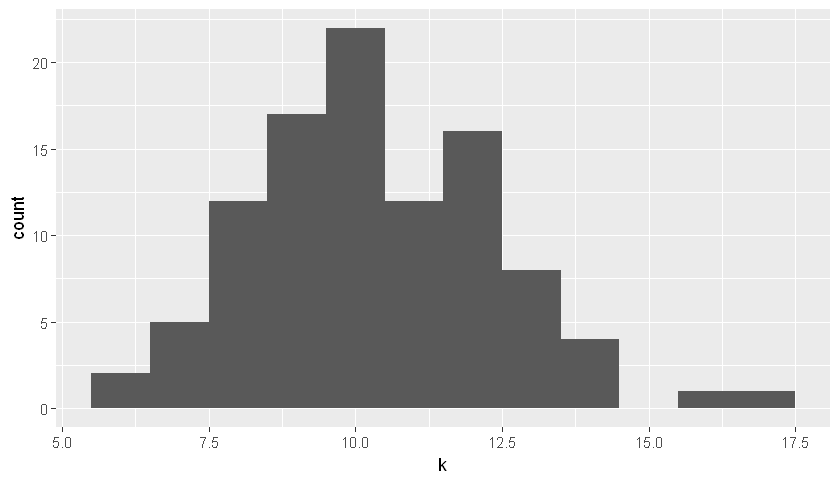

In [13]:
ggplot(data.frame(k=repeated_sequences)) +
    aes(x=k) +
    geom_histogram(binwidth=1)

We can see that values close to 10 are the most common.

What if we have a weighted coin, so that $P(\mathsf{H}) = 0.7$?

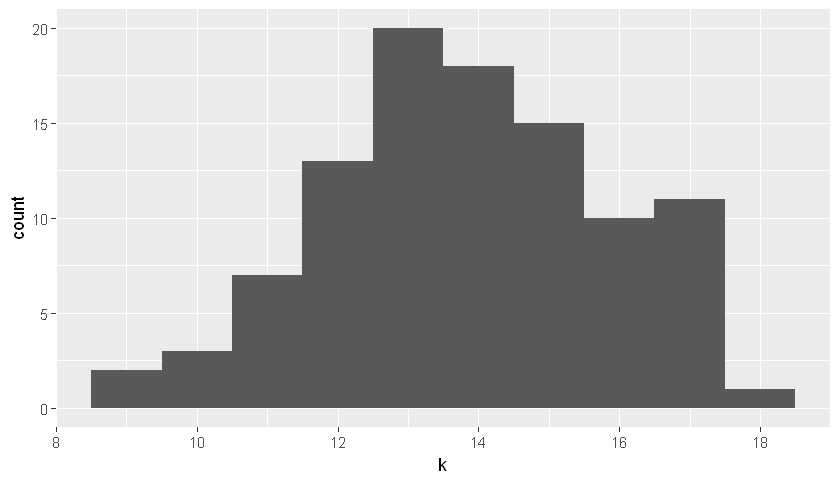

In [14]:
repeated_sequences = sapply(1:100, function(t) {
    sum(flip(20, 0.7) == 'H')
})
ggplot(data.frame(k=repeated_sequences)) +
    aes(x=k) +
    geom_histogram(binwidth=1)

Now 13-16 are the most common values, which we would expect, since $0.7 \cdot 20 = 14$.

Now, we can directly compute the probability of observing $k$ successes in $n$ trials without needing to simulate all these trials.  The probabiltiy $P(k|n,p)$ (read ‘the probability of $k$ given $n$ and $p$’) can be written:

$$P(k|n,p) = {{n}\choose{k}} p^k (1-p)^{(n-k)}$$

R has a built-in definition of this function called `dbinom`:

In [15]:
dbinom(14, 20, 0.7)

[1] 0.191639

For fixed $n$ and $p$, this binomial distribution itself is a discrete distribution over the integers $0 \dots n$, and we can also visualize it:

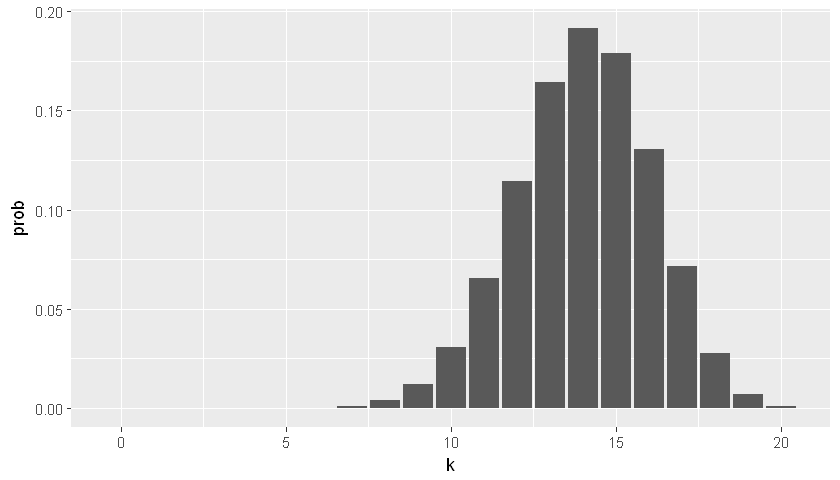

In [16]:
ggplot(data.frame(k=0:20) %>% mutate(prob=dbinom(k, 20, 0.7))) +
    aes(x=k, y=prob) +
    geom_bar(stat='identity')

We can observe that our flip above has the same basic shape. Randomness means that it won't quite align perfectly, but on average it will be pretty close.

## Joint Distributions

We have now seen how we can start to think about the distribution of a single random variable by counting; often, though, we care about more than one variable.

Let's look at the carrier airlines for our NYC flights:

In [17]:
flights %>%
    group_by(carrier) %>%
    summarize(count=n())

carrier,count
9E,18460
AA,32729
AS,714
B6,54635
DL,48110
EV,54173
F9,685
FL,3260
HA,342
MQ,26397


We now have a bunch of carriers, and we can convert this to a probability distribution to estimate the probability of a plan being from a particular airline.

We can also start to think about airlines _and_ flights. Let's do a bit more R trickery! We can group by two variables:

In [18]:
origin_carrier_flights = flights %>%
    group_by(origin, carrier) %>%
    summarize(count=n()) %>%
    ungroup() %>%
    mutate(prob = count / sum(count))
head(origin_carrier_flights)

origin,carrier,count,prob
EWR,9E,1268,0.003765114
EWR,AA,3487,0.010354063
EWR,AS,714,0.002120104
EWR,B6,6557,0.019469915
EWR,DL,4342,0.012892843
EWR,EV,43939,0.130469511


> **R Note:** this contains 2 new functions. `mutate` is the `dplyr` way of doing the normalization we did previously for origins; it lets us compute a new variable based on other variables in the data frame. `ungroup` removes the grouping data introduced by `group_by`, so that `sum` sums over the entire data frame.

In [19]:
sum(origin_carrier_flights$prob)

[1] 1

This is probability distribution is called a _joint probability distribution_: it is the probability of two variables simultaneously taking on the given values.  We can write it $P(O, C)$: the probability of a specific origin and carrier.  So $P(O=\mathsf{EWR}, C=\mathsf{AA}) \approx 0.010$.

It can be easier to visualize this in a more matrix-like form. The `spread` function lets us convert data in this form (‘tall’) into a ‘wide’ format; the `select(-count)` operation removes the `count` column from the data frame:

In [20]:
origin_carrier_wide = spread(origin_carrier_flights %>% select(-count), origin, prob, fill=0)
origin_carrier_wide

carrier,EWR,JFK,LGA
9E,0.003765114,0.043503694,7.545074e-03
AA,0.010354063,0.040926313,4.590291e-02
AS,0.002120104,0.000000000,0.000000e+00
B6,0.019469915,0.124937644,1.782194e-02
DL,0.012892843,0.061468157,6.849360e-02
EV,0.130469511,0.004180820,2.620733e-02
F9,0.000000000,0.000000000,2.033993e-03
FL,0.000000000,0.000000000,9.680025e-03
HA,0.000000000,0.001015512,0.000000e+00
MQ,0.006758201,0.021358410,5.026486e-02


We can then convert this into an R _matrix_:

In [21]:
origin_carrier_matrix = as.matrix(select(origin_carrier_wide, -carrier))
row.names(origin_carrier_matrix) = origin_carrier_wide$carrier
origin_carrier_matrix

,EWR,JFK,LGA
9E,0.003765114,0.043503694,7.545074e-03
AA,0.010354063,0.040926313,4.590291e-02
AS,0.002120104,0.000000000,0.000000e+00
B6,0.019469915,0.124937644,1.782194e-02
DL,0.012892843,0.061468157,6.849360e-02
EV,0.130469511,0.004180820,2.620733e-02
F9,0.000000000,0.000000000,2.033993e-03
FL,0.000000000,0.000000000,9.680025e-03
HA,0.000000000,0.001015512,0.000000e+00
MQ,0.006758201,0.021358410,5.026486e-02


This is our joint distribution: each cell contains the probability of a randomly selected flight being on the particular carrier _and_ from the specifeid airport. We can check its sum again:

In [22]:
sum(origin_carrier_matrix)

[1] 1

Ok, that's better.

### Marginal Probabilities

One of the things we often want to do with a joint probability distribution is compute the _marginal distributions_ of its variables.  If we have a joint distribution $P(A,B)$, the marginal distribution $P(A) = \sum_{b \in B} P(A,B)$.  When our joint distribution is a matrix, R makes it very easy to compute the marginals:

In [23]:
rowSums(origin_carrier_matrix)

9E           AA           AS           B6           DL           EV 
5.481388e-02 9.718329e-02 2.120104e-03 1.622295e-01 1.428546e-01 1.608577e-01 
          F9           FL           HA           MQ           OO           UA 
2.033993e-03 9.680025e-03 1.015512e-03 7.838148e-02 9.501865e-05 1.741959e-01 
          US           VX           WN           YV 
6.097822e-02 1.532770e-02 3.644856e-02 1.784569e-03

This is the probability of a randomly selected aircraft being operated by the specified carrier.

In [24]:
colSums(origin_carrier_matrix)

EWR       JFK       LGA 
0.3587993 0.3304244 0.3107763

If you compare these with the airport probabilities we estimated at the beginning, you should find them to be the same. This is a useful sanity check - they should be the same! But sometimes we have a joint distribution, and we want to extract the marginal distribution from it.

Joint probability distributions are also symmetric - it makes no difference whether we write $P(O,C)$ or $P(C,O)$.

### Conditional Probability

Another useful kind of probability we can derive from a joint distribution is the _conditional_ probability.  For example, the conditional probability $P(O|C)$ is the probability that an airplane left a particular airport **given that** we know it is operated by a given carrier.

The probability $P(O|C) = \frac{P(O,C)}{P(C)}$.


In [25]:
origin_carrier_cond = origin_carrier_matrix / rowSums(origin_carrier_matrix)
origin_carrier_cond

,EWR,JFK,LGA
9E,0.06868906,0.79366197,0.1376490
AA,0.10654160,0.42112500,0.4723334
AS,1.00000000,0.00000000,0.0000000
B6,0.12001464,0.77012904,0.1098563
DL,0.09025151,0.43028476,0.4794637
EV,0.81108670,0.02599081,0.1629225
F9,0.00000000,0.00000000,1.0000000
FL,0.00000000,0.00000000,1.0000000
HA,0.00000000,1.00000000,0.0000000
MQ,0.08622192,0.27249309,0.6412850


What's that we just did? We divided a matrix by a vector that has as many entries as the matrix has rows. This divides every entry in the matrix by the value corresponding to its row. Neat, huh? We can check that each row is a probability distribution:

In [26]:
rowSums(origin_carrier_cond)

9E AA AS B6 DL EV F9 FL HA MQ OO UA US VX WN YV 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

Each row of our new matrix is a probability distribution over airports, given that we know the carrier of the airline. Cool!  If we know that the flight is United (UA), then it is most likely from Newark (EWR) - $P(\mathsf{EWR}|\mathsf{UA}) = 0.78$.

Now, unlike joint probabilities, conditional probabilities are _not_ symmetric: $P(O|C) \ne P(C|O)$.  If we want to compute $P(C|O)$, we can use `t` to _transpose_ our matrix and normalize rows to be distributions again:

In [27]:
carrier_origin_cond = t(origin_carrier_matrix) / colSums(origin_carrier_matrix)
carrier_origin_cond

,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
EWR,0.01049365,0.02885753,0.005908884,0.05426408,0.0359333,0.36362809,0.000000000,0.00000000,0.000000000,0.01883560,4.965449e-05,0.38140439,0.03645467,0.01295982,0.05121033,0.000000000
JFK,0.13166006,0.12385985,0.000000000,0.37811267,0.1860279,0.01265288,0.000000000,0.00000000,0.003073356,0.06463933,0.000000e+00,0.04074444,0.02691433,0.03231517,0.00000000,0.000000000
LGA,0.02427815,0.14770404,0.000000000,0.05734651,0.2203952,0.08432860,0.006544878,0.03114789,0.000000000,0.16173970,2.484187e-04,0.07685693,0.12550878,0.00000000,0.05815864,0.005742294


In [28]:
rowSums(carrier_origin_cond)

EWR JFK LGA 
  1   1   1

If we want to visualize conditional probabilities, the easiest way is with a _faceted_ plot. First let's convert our conditional distribution to a tall data frame:

In [29]:
carrier_origin_frame = as.data.frame(carrier_origin_cond)
carrier_origin_frame$origin = row.names(carrier_origin_cond)
carrier_origin_tall = gather(carrier_origin_frame, carrier, prob, -origin)
head(carrier_origin_tall)

origin,carrier,prob
EWR,9E,0.01049365
JFK,9E,0.13166006
LGA,9E,0.02427815
EWR,AA,0.02885753
JFK,AA,0.12385985
LGA,AA,0.14770404


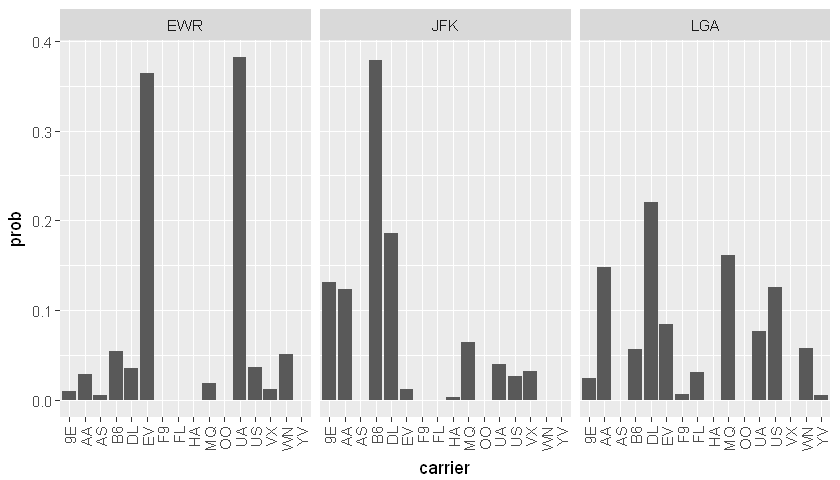

In [30]:
ggplot(carrier_origin_tall) +
    aes(x=carrier, y=prob) +
    geom_bar(stat='identity') +
    facet_wrap(~ origin) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))

## Independence of Variables

Two variables are _independent_ if $P(A,B) = P(A) P(B)$ — that is, we can compute the probability of $a$ and $b$ happening at the same time by independently computing the probabilities of $a$ and $b$, and multiplying them.  What this means in practice is that knowing $A$ tells us nothing about $B$. We can see that our origin airport and carrier are not independent - observing either tells us quite a bit about the other.

But let's go back to our binomial distribution: when flipping a coin, each flip is independent.  Knowing I flipped heads tells me nothing about whether the next flip will be heads.

This is the key to making the binomial distribution formula work: the probability of flipping $\mathsf{HH}$ is $P(X_1=\mathsf{H},X_2=\mathsf{H}) = P(\mathsf{H})P(\mathsf{H})$

The same is true of rolling dice: the results of a roll of two fair dice is the product of the individual die probabilities.

## Bayes' Theorem

Remember that $P(A|B) \ne P(B|A)$?  There is, however, a way that we can convert between these two probabilities!

$$P(A|B) = \frac{P(B|A)P(B)}{P(A)}$$

That is, with one conditional distribution and both marginal distributions, we can compute the other conditional distribution.  To see why this is true, we can expand the definition of conditional probability:

$$\begin{align*}
P(B|A) & = P(A,B)P(A) \\
P(A|B) & = P(A,B)P(B) \\
& = \frac{P(B|A)}{P(A)} P(B) \\
& = \frac{P(B|A) P(B)}{P(A)}
\end{align*}$$